In [1]:
import pandas as pd
from scipy.cluster.vq import kmeans,vq,whiten
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import time
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as ax5

In [2]:
start_time = time.time()

In [3]:
dataset = pd.read_csv('hidrat_data.csv')

In [4]:
dataset = dataset.iloc[:,[1,2,3,4,5]].values

In [5]:
 # whitening of data
# dataset = whiten(dataset)
scale = StandardScaler()
dataset=scale.fit_transform(dataset)

In [6]:
# computing K-Means with K = 10 (10 clusters)
centroids,_ = kmeans(dataset,10)
centroids

array([[ 0.51175822, -0.02868505,  0.03930866,  0.91300115, -0.22285082],
       [-1.25603753,  0.790764  , -3.66281497,  1.82368944,  4.4796975 ],
       [ 1.14966661, -4.20648181,  0.15724507, -1.35614594, -0.22285082],
       [ 0.4459676 , -0.30359471,  0.33711666, -0.98352498, -0.22285082],
       [-0.79980637, -0.30891825,  0.70563919, -1.0977942 , -0.22285082],
       [ 1.89396984, -0.0474755 , -0.35848699,  0.93317916, -0.22285082],
       [-1.00869555,  2.54827966,  0.70567678,  0.36882885, -0.22285082],
       [-0.48594393,  0.78140118, -0.46562082, -0.03096163, -0.22285082],
       [-0.87302648,  0.13638293,  0.61166076,  0.77190686, -0.22285082],
       [ 0.51989572, -0.27196446, -0.77222482,  0.06349542, -0.22285082]])

In [7]:
# assign each sample to a cluster
clx,_ = vq(dataset,centroids)
clx

array([6, 6, 6, ..., 1, 1, 1])

In [8]:
# The coordinates of each data are replaced by the coordinates of the center of the cluster in train dataset
dataset_vq = np.zeros((len(clx),centroids.shape[1]))
for i in range(len(clx)):
    dataset_vq[i] = centroids[clx[i]]
dataset_vq= scale.inverse_transform(dataset_vq)
dataset_vq

array([[2.43344202e+04, 4.89060284e+00, 1.25865750e+03, 1.00336879e+01,
        6.17561557e-16],
       [2.43344202e+04, 4.89060284e+00, 1.25865750e+03, 1.00336879e+01,
        6.17561557e-16],
       [2.43344202e+04, 4.89060284e+00, 1.25865750e+03, 1.00336879e+01,
        6.17561557e-16],
       ...,
       [8.80873506e+03, 3.10274637e+00, 5.22751616e+02, 1.80290792e+01,
        9.98384491e-01],
       [8.80873506e+03, 3.10274637e+00, 5.22751616e+02, 1.80290792e+01,
        9.98384491e-01],
       [8.80873506e+03, 3.10274637e+00, 5.22751616e+02, 1.80290792e+01,
        9.98384491e-01]])

In [9]:
X = dataset_vq[:,[0,1,3,4]]
Y = dataset_vq[:,[2]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

In [11]:
st_x = StandardScaler()
X_train=st_x.fit_transform(X_train)
st_y = StandardScaler()
y_train=st_y.fit_transform(y_train)
X_test=st_x.fit_transform(X_test)
y_test=st_y.fit_transform(y_test)

In [12]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

In [13]:
# # whitening of data
# X_train = whiten(X_train)
# X_test = whiten(X_test)
# y_train = whiten(y_train)
# y_test = whiten(y_test)

In [14]:
# # computing K-Means with K = 10 (10 clusters)
# centroids_train,_ = kmeans(X_train,10)
# centroids_test,_ = kmeans(X_test,10)

In [15]:
# centroids_train

In [16]:
# # assign each sample to a cluster
# clx_train,_ = vq(X_train,centroids_train)
# clx_test,_ = vq(X_test,centroids_test)

In [17]:
# clx_train

In [18]:
# # The coordinates of each data are replaced by the coordinates of the center of the cluster in train dataset
# X_train_vq = np.zeros((len(clx_train),centroids_train.shape[1]))
# for i in range(len(clx_train)):
#     X_train_vq[i] = centroids_train[clx_train[i]]

In [19]:
# # The coordinates of each data are replaced by the coordinates of the center of the cluster in test dataset
# X_test_vq = np.zeros((len(clx_test),centroids_test.shape[1]))
# for i in range(len(clx_test)):
#     X_test_vq[i] = centroids_test[clx_test[i]]

In [20]:
regressor = SVR(kernel='rbf')

In [21]:
regressor.fit(X_train,y_train)

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


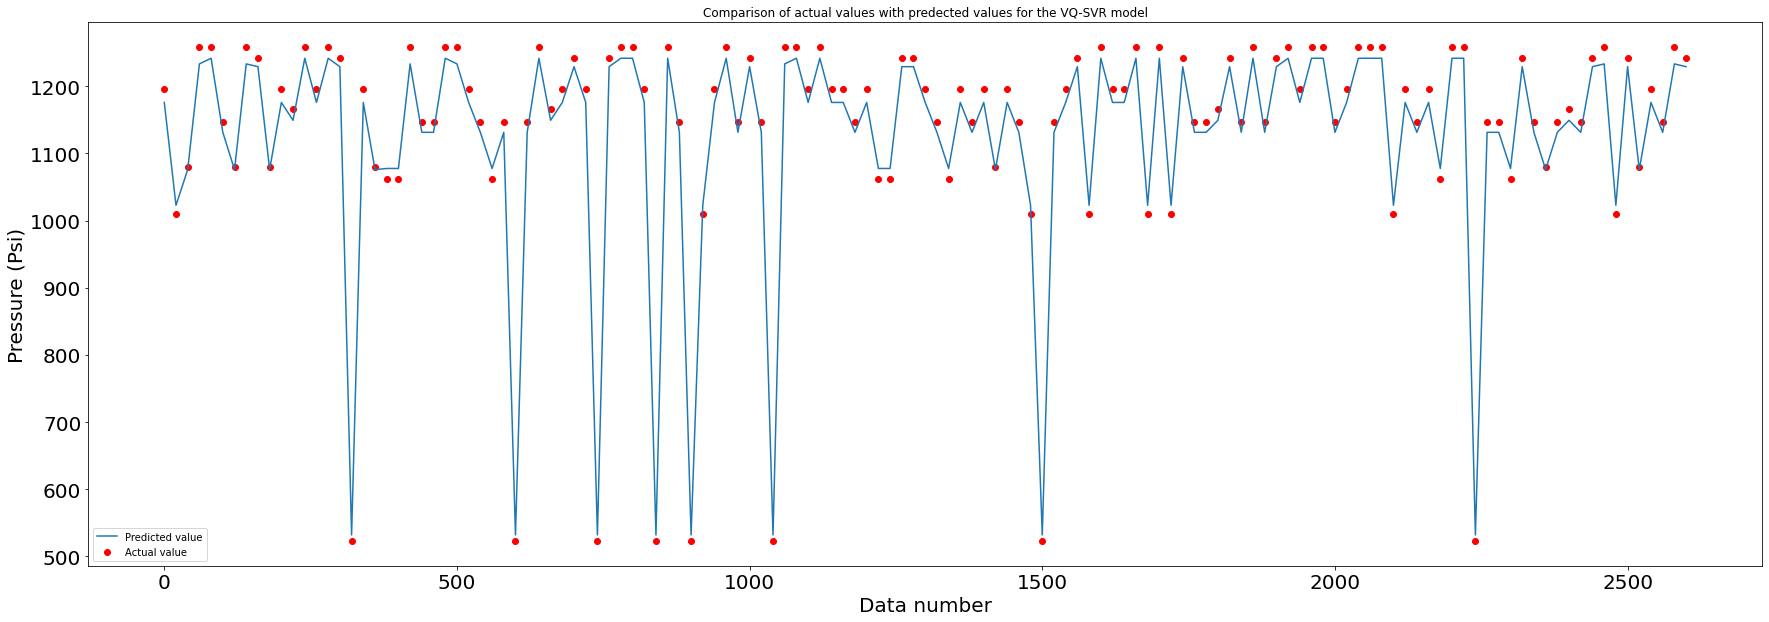

In [22]:
test_num = []
for i in range(len(y_test)):
    test_num.append(i)
test_num = test_num[::20]
model_predict = regressor.predict(X_test)
model_predict = st_y.inverse_transform(model_predict)
y_test2 = st_y.inverse_transform(y_test)
model_predict2=model_predict[::20]
y_test_each20 = y_test2[::20]
fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(111)
ax2.plot(test_num,model_predict2, label='Predicted value')
ax2.scatter(test_num,y_test_each20 , label = 'Actual value',color= 'red')
ax2.set_title('Comparison of actual values with predected values for the VQ-SVR model')
ax2.set_xlabel('Data number',size = 20)
ax2.set_ylabel('Pressure (Psi)',size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax2.legend()
fig.show()

No handles with labels found to put in legend.


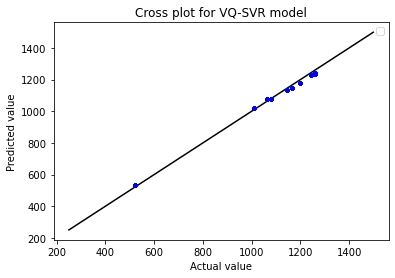

In [23]:
cross = []
i = 250
while i!=1500:
    cross.append(i)
    i = i+1
ax5.plot(cross,cross, color='black')
ax5.plot(y_test2,model_predict,'bo', markersize=3, color='blue')
# ax5.plot(y_train,model_predict_train,'bo', markersize=3,label='Train Data', color='red',marker = '<')
ax5.title('Cross plot for VQ-SVR model')
ax5.xlabel('Actual value')
ax5.ylabel('Predicted value')
ax5.legend()
ax5.show()

In [24]:
r2_score(y_train, regressor.predict(X_train))

0.9909848261863081

In [25]:
sqrt(mean_squared_error(y_train, regressor.predict(X_train)))

0.09494826914531851

In [26]:
r2_score(y_test, regressor.predict(X_test))

0.9902206864093595

In [27]:
sqrt(mean_squared_error(y_test, regressor.predict(X_test)))

0.09889041202584055

In [28]:
time.time() - start_time

5.388338088989258